# Dynamic simulation for "match v0"

In [939]:
using LinearAlgebra, DifferentialEquations, Plots, Statistics

In [940]:
function ResCon!(du,u,para,t)
    N_s,N_r,G,C,gamma,δ = para
    du[1:N_s] = u[1:N_s].*(G*u[N_s+1:N_r+N_s] - δ) .+ 1e-7
    du[N_s+1:N_r+N_s] = gamma - u[N_s+1:N_r+N_s].*(C'*u[1:N_s])
end

ResCon! (generic function with 1 method)

In [941]:
N = 96
M = 32

ρ = 0.8

Tgc = randn(N, M , 2)
G = Tgc[:,:,1]
C = ρ * G + √(1-ρ^2) * Tgc[:,:,2]

G = G .+ 1.0
C = C .+ 1.0

Ss = 0.01 .+ 0.99*rand(N)
Rs = 0.01 .+ 0.99*rand(M)

γ = Rs .* (C' * Ss)
δ = G * Rs;

In [942]:
tspan = (0.0, 5000.0) # time for one test solution
#para = (Ns,Nr,G,C,g,K,δ)

para = (N,M,G,C,γ,δ)

u0 = zeros(N+M)
u0[1:N] = Ss .* (1 .+ 1.0*(rand(N) .- 0.5))
u0[N+1:end] = Rs .* (1 .+ 1.0*(rand(M) .- 0.5))

prob = ODEProblem(ResCon!,u0,tspan,para)
#VCABM3() or Tsit5() or TRBDF2(), AutoVern7(Rodas4())
sol = solve(prob, saveat = 5, AutoVern7(Rodas4()), isoutofdomain = (u,p,t)->any(x->x < 0.0,u));

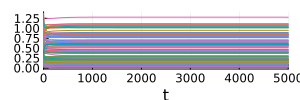

In [950]:
plot(sol,idxs = 1:N,legend = false,
    size = (300,100))

In [951]:
mean(abs.(sol.u[end][1:N] - Ss))

0.11753387803061278

In [952]:
#savefig("../figures/speciesN96.pdf");

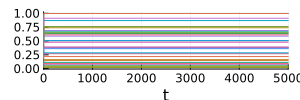

In [953]:
plot(sol,idxs = N+1:N+M,legend = false,
size = (300,100))

In [954]:
mean(abs.(sol.u[end][N+1:N+M] - Rs))

4.108862737832626e-8

In [955]:
#savefig("../figures/resourcesN96.pdf");